In [85]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

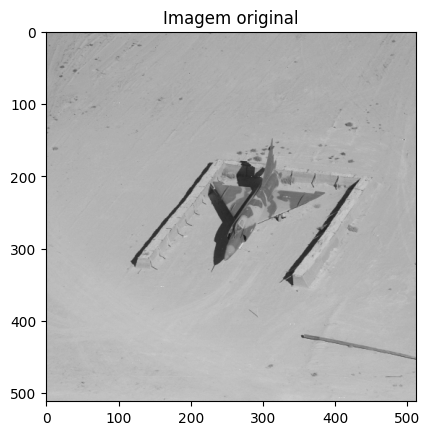

In [86]:
image = cv2.imread("./imgs/7.1.02.tiff")

plt.imshow(image)
plt.title("Imagem original")
plt.show()

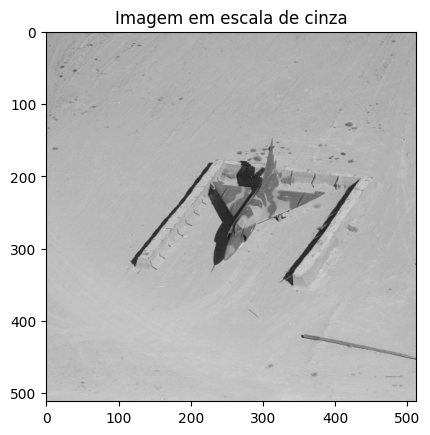

In [87]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap="gray")
plt.title("Imagem em escala de cinza")
plt.show()

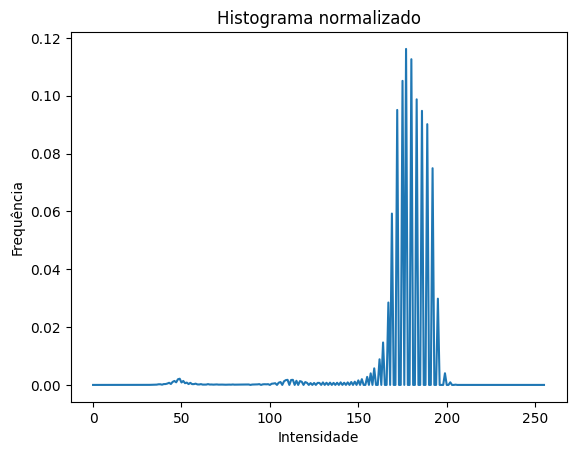

In [88]:
hist_grey = cv2.calcHist([gray], [0], None, [256], [0, 256])
norm_hist = hist_grey / (gray.shape[0] * gray.shape[1])

fig, ax = plt.subplots()
ax.plot(norm_hist)
ax.set_title("Histograma normalizado")
ax.set_xlabel("Intensidade")
ax.set_ylabel("Frequência")
plt.show()

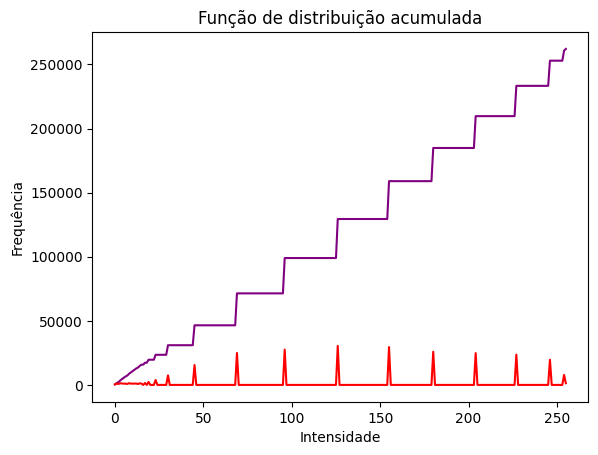

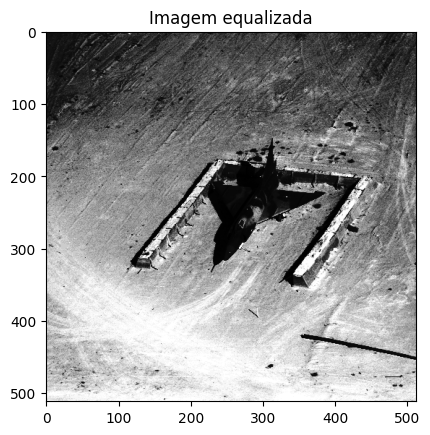

In [92]:
eq_gray = cv2.equalizeHist(gray)

eq_hist = cv2.calcHist([eq_gray], [0], None, [256], [0, 256])
eq_cumulative_distribution_function = eq_hist.cumsum()

fig, ax = plt.subplots()
ax.plot(
    eq_cumulative_distribution_function,
    color="purple",
    label="Função de distribuição acumulada",
)
ax.plot(eq_hist, color="red", label="Histograma")
ax.set_title("Função de distribuição acumulada")
ax.set_xlabel("Intensidade")
ax.set_ylabel("Frequência")
plt.show()

plt.imshow(eq_gray, cmap="gray")
plt.title("Imagem equalizada")
plt.show()

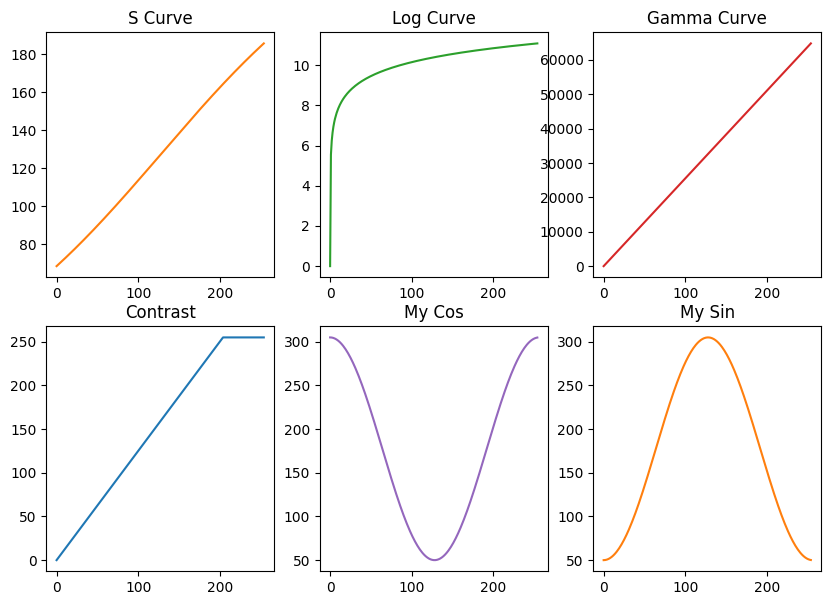

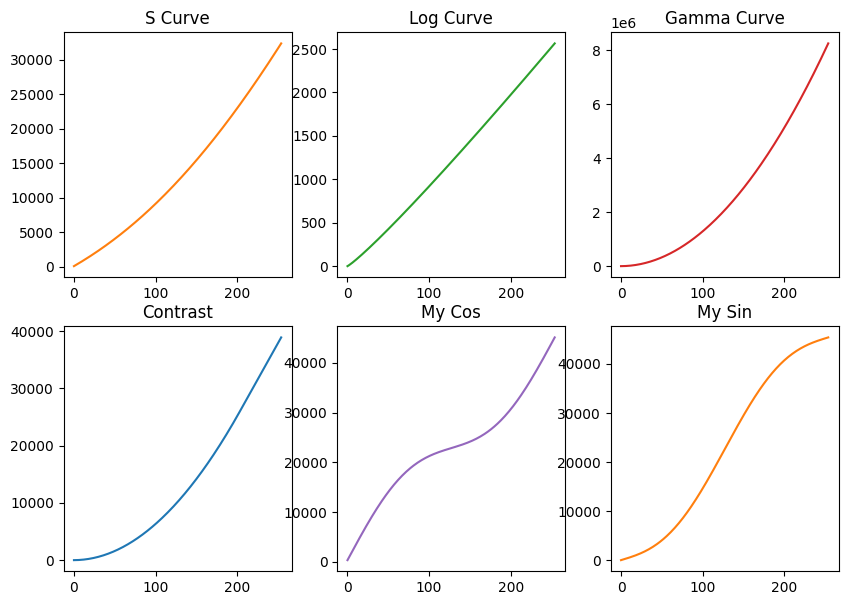

In [100]:
def s_curve(x, a: float = 1):
    x -= 128
    x /= 128
    return 255 / (1 + np.exp(-a * x))


def log_curve(x, a: float = 255):
    return np.log(1 + a * x)


def gamma_curve(x, gamma: float = 1):
    return 255 * np.power(x , gamma)


def contrast(x, alpha: float = 1.25):
    return max(0, min(alpha * x, 255))


def my_cos(x, cutoff_point: int = 50):
    return 255 * np.cos((x * np.pi / 2) / 128) ** 2 + cutoff_point


def my_sin(x, cutoff_point: int = 50):
    return 255 * np.sin((x * np.pi / 2) / 128) ** 2 + cutoff_point


# plot all curves
def gen_data(
    x_range: range,
    fx,
):
    image = []
    domain = []
    for i in x_range:
        image.append(fx(x=i))
        domain.append(i)
    return np.array(domain), np.array(image)


s_curve_x, s_curve_y = gen_data(range(0, 255), s_curve)
log_curve_x, log_curve_y = gen_data(range(0, 255), log_curve)
gamma_curve_x, gamma_curve_y = gen_data(range(0, 255), gamma_curve)
contrast_x, contrast_y = gen_data(range(0, 255), contrast)
my_cos_x, my_cos_y = gen_data(range(0, 255), my_cos)
my_sin_x, my_sin_y = gen_data(range(0, 255), my_sin)

s_curve_y_cumsum = s_curve_y.cumsum()
log_curve_y_cumsum = log_curve_y.cumsum()
gamma_curve_y_cumsum = gamma_curve_y.cumsum()
contrast_y_cumsum = contrast_y.cumsum()
my_cos_y_cumsum = my_cos_y.cumsum()
my_sin_y_cumsum = my_sin_y.cumsum()

fig, axs = plt.subplots(2, 3, figsize=(10, 7))

axs[0, 0].set_title("S Curve")
axs[0, 0].plot(s_curve_x, s_curve_y, "tab:orange", label="f(x)")

axs[0, 1].set_title("Log Curve")
axs[0, 1].plot(log_curve_x, log_curve_y, "tab:green", label="f(x)")

axs[0, 2].set_title("Gamma Curve")
axs[0, 2].plot(gamma_curve_x, gamma_curve_y, "tab:red", label="f(x)")

axs[1, 0].set_title("Contrast")
axs[1, 0].plot(contrast_x, contrast_y, "tab:blue", label="f(x)")

axs[1, 1].set_title("My Cos")
axs[1, 1].plot(my_cos_x, my_cos_y, "tab:purple", label="f(x)")

axs[1, 2].set_title("My Sin")
axs[1, 2].plot(my_sin_x, my_sin_y, "tab:orange", label="f(x)")

plt.show()


fig, axs = plt.subplots(2, 3, figsize=(10, 7))

axs[0, 0].set_title("S Curve")
axs[0, 0].plot(s_curve_x, s_curve_y_cumsum, "tab:orange", label="F(x)")

axs[0, 1].set_title("Log Curve")
axs[0, 1].plot(log_curve_x, log_curve_y_cumsum, "tab:green", label="F(x)")

axs[0, 2].set_title("Gamma Curve")
axs[0, 2].plot(gamma_curve_x, gamma_curve_y_cumsum, "tab:red", label="F(x)")

axs[1, 0].set_title("Contrast")
axs[1, 0].plot(contrast_x, contrast_y_cumsum, "tab:blue", label="F(x)")

axs[1, 1].set_title("My Cos")
axs[1, 1].plot(my_cos_x, my_cos_y_cumsum, "tab:purple", label="F(x)")

axs[1, 2].set_title("My Sin")
axs[1, 2].plot(my_sin_x, my_sin_y_cumsum, "tab:orange", label="F(x)")

plt.show()

In [103]:
def apply_map(img, mapping):
    shape = img.shape
    new_img = np.zeros(shape, dtype="uint8")
    maxi = mapping.max()
    mini = mapping.min()
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            new_img[i,j] = (mapping[img[i,j]-1] - mini) * 255 / (maxi - mini)
    return new_img

gray = gray
s_curve_y_img = apply_map(eq_gray,s_curve_y_cumsum)
log_curve_y_img = apply_map(eq_gray,log_curve_y_cumsum)
gamma_curve_y_img = apply_map(eq_gray,gamma_curve_y_cumsum)
contrast_y_img = apply_map(eq_gray,contrast_y_cumsum)
my_cos_y_img = apply_map(eq_gray,my_cos_y_cumsum)
my_sin_y_img = apply_map(eq_gray,my_sin_y_cumsum)

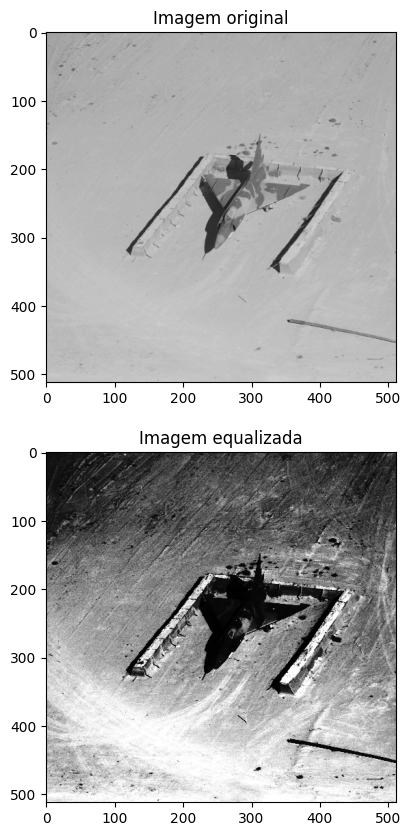

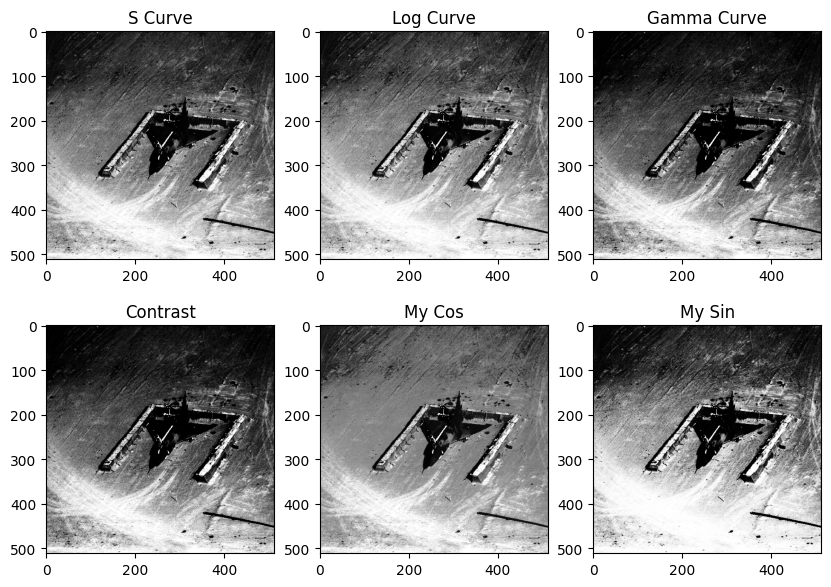

In [104]:
fig, axs = plt.subplots(2, 1, figsize=(5,10))
gray = gray
eq_gray = eq_gray
axs[0].set_title("Imagem original")
axs[0].imshow(gray, cmap="gray")

axs[1].set_title("Imagem equalizada")
axs[1].imshow(eq_gray, cmap="gray")

plt.show()

fig, axs = plt.subplots(2, 3, figsize=(10, 7))

axs[0, 0].set_title("S Curve")
axs[0, 0].imshow(s_curve_y_img, cmap="gray")

axs[0, 1].set_title("Log Curve")
axs[0, 1].imshow(log_curve_y_img, cmap="gray")

axs[0, 2].set_title("Gamma Curve")
axs[0, 2].imshow(gamma_curve_y_img, cmap="gray")

axs[1, 0].set_title("Contrast")
axs[1, 0].imshow(contrast_y_img, cmap="gray")

axs[1, 1].set_title("My Cos")
axs[1, 1].imshow(my_cos_y_img, cmap="gray")

axs[1, 2].set_title("My Sin")
axs[1, 2].imshow(my_sin_y_img, cmap="gray")

plt.show()